In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [11]:
df = pd.read_csv("./alturaPadresHijos.csv")

In [12]:
df.describe()

,id,Midparent,Child,Quartile
count,928.000000,928.000000,928.000000,928.000000
mean,464.500000,68.308190,68.088470,2.063578
std,268.034824,1.787333,2.517941,1.092906
min,1.000000,64.000000,61.700000,1.000000
25%,232.750000,67.500000,66.200000,1.000000
50%,464.500000,68.500000,68.200000,2.000000
75%,696.250000,69.500000,70.200000,3.000000
max,928.000000,73.000000,73.700000,4.000000


<img src="./MicrosoftTeams-image1.png">

In [13]:
df["Midparent_cm"] = df["Midparent"]*2.54
df["Child_cm"] = df["Child"]*2.54

In [14]:
df.head()

,id,Midparent,Child,Quartile,Midparent_cm,Child_cm
0,1,64.0,61.7,1,162.56,156.718
1,2,64.0,63.2,1,162.56,160.528
2,3,64.0,63.2,1,162.56,160.528
3,4,64.0,64.2,1,162.56,163.068
4,5,64.0,64.2,1,162.56,163.068


In [15]:
df.shape

(928, 6)

In [16]:
df["xy"] = df["Midparent_cm"] * df["Child_cm"]
df["x^2"] = df["Midparent_cm"]**2

In [17]:
df.head()

,id,Midparent,Child,Quartile,Midparent_cm,Child_cm,xy,x^2
0,1,64.0,61.7,1,162.56,156.718,25476.07808,26425.7536
1,2,64.0,63.2,1,162.56,160.528,26095.43168,26425.7536
2,3,64.0,63.2,1,162.56,160.528,26095.43168,26425.7536
3,4,64.0,64.2,1,162.56,163.068,26508.33408,26425.7536
4,5,64.0,64.2,1,162.56,163.068,26508.33408,26425.7536


In [18]:
m_numerador = (df.shape[0]*sum(df["xy"])) - (sum(df["Midparent_cm"]) * sum(df["Child_cm"]))
print(m_numerador)

11458667.405128479


In [19]:
m_denominador = (df.shape[0]*sum(df["x^2"])) - (sum(df["Midparent_cm"])**2)
print(m_denominador)

17729900.023792267


In [20]:
m = m_numerador/m_denominador
print(m)

0.6462905819971777


In [21]:
b = (sum(df["Child_cm"]) - m*sum(df["Midparent_cm"])) / df.shape[0]
print(b)

60.81148665763481


In [22]:
X = 185

In [23]:
Y = m*X + b
print(Y)

180.37524432711268


<img src="./MicrosoftTeams-image.png">

In [24]:
x_prom = np.mean(df["Midparent_cm"])
print(x_prom)
y_prom = np.mean(df["Child_cm"])
print(y_prom)

173.50280172413792
172.944713362069


In [25]:
df["x-x_prom"] = df["Midparent_cm"] - x_prom
df["y-y_prom"] = df["Child_cm"] - y_prom

In [26]:
theta_1_numerador = sum(df["x-x_prom"]*df["y-y_prom"])
print(theta_1_numerador)

12347.701945258668


In [27]:
theta_1_denumerador = sum(df["x-x_prom"]**2)
print(theta_1_denumerador)

19105.49571551736


In [28]:
theta_1 = theta_1_numerador / theta_1_denumerador
print(theta_1)

0.6462905819936378


In [29]:
theta_0 = y_prom - theta_1*x_prom
print(theta_0)

60.811486658249166


In [30]:
y_gorro = theta_0 + theta_1 * X
print(y_gorro)

180.37524432707215


In [31]:
from sklearn.linear_model import LinearRegression
regr = LinearRegression()

In [32]:
regr.fit(df[["Midparent_cm"]],df["Child_cm"])

LinearRegression()

In [33]:
print("m:", regr.coef_)

m: [0.64629058]


In [34]:
print("b:", regr.intercept_)

b: 60.81148665824871


In [35]:
y_gorro = regr.coef_*X + regr.intercept_
print(y_gorro)

[180.37524433]


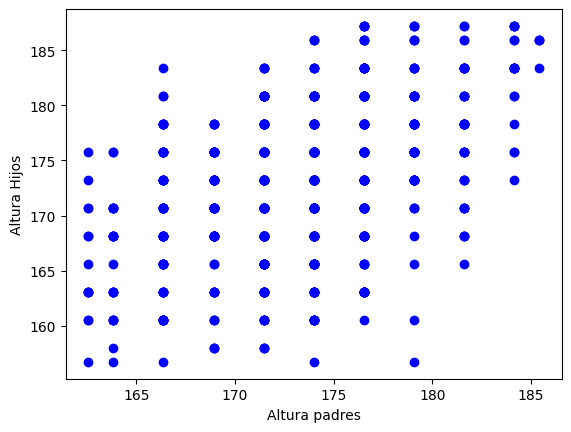

In [36]:
plt.scatter(df["Midparent_cm"], df["Child_cm"], color="blue")
plt.xlabel("Altura padres")
plt.ylabel("Altura Hijos")
plt.show()

In [37]:
print(np.corrcoef(df["Midparent_cm"], df["Child_cm"]))

[[1.         0.45876237]
 [0.45876237 1.        ]]


In [41]:
df.head()

,id,Midparent,Child,Quartile,Midparent_cm,Child_cm,xy,x^2,x-x_prom,y-y_prom,predict,residual
0,1,64.0,61.7,1,162.56,156.718,25476.07808,26425.7536,-10.942802,-16.226713,165.872484,-9.154484
1,2,64.0,63.2,1,162.56,160.528,26095.43168,26425.7536,-10.942802,-12.416713,165.872484,-5.344484
2,3,64.0,63.2,1,162.56,160.528,26095.43168,26425.7536,-10.942802,-12.416713,165.872484,-5.344484
3,4,64.0,64.2,1,162.56,163.068,26508.33408,26425.7536,-10.942802,-9.876713,165.872484,-2.804484
4,5,64.0,64.2,1,162.56,163.068,26508.33408,26425.7536,-10.942802,-9.876713,165.872484,-2.804484


In [38]:
df["predict"]=regr.predict(df[["Midparent_cm"]])

In [39]:
df["residual"]=df["Child_cm"]-df["predict"]

In [40]:
df.head(20)

,id,Midparent,Child,Quartile,Midparent_cm,Child_cm,xy,x^2,x-x_prom,y-y_prom,predict,residual
0,1,64.0,61.7,1,162.56,156.718,25476.07808,26425.7536,-10.942802,-16.226713,165.872484,-9.154484
1,2,64.0,63.2,1,162.56,160.528,26095.43168,26425.7536,-10.942802,-12.416713,165.872484,-5.344484
2,3,64.0,63.2,1,162.56,160.528,26095.43168,26425.7536,-10.942802,-12.416713,165.872484,-5.344484
3,4,64.0,64.2,1,162.56,163.068,26508.33408,26425.7536,-10.942802,-9.876713,165.872484,-2.804484
4,5,64.0,64.2,1,162.56,163.068,26508.33408,26425.7536,-10.942802,-9.876713,165.872484,-2.804484
5,6,64.0,64.2,1,162.56,163.068,26508.33408,26425.7536,-10.942802,-9.876713,165.872484,-2.804484
6,7,64.0,64.2,1,162.56,163.068,26508.33408,26425.7536,-10.942802,-9.876713,165.872484,-2.804484
7,8,64.0,65.2,1,162.56,165.608,26921.23648,26425.7536,-10.942802,-7.336713,165.872484,-0.264484
8,9,64.0,66.2,1,162.56,168.148,27334.13888,26425.7536,-10.942802,-4.796713,165.872484,2.275516
9,10,64.0,66.2,1,162.56,168.148,27334.13888,26425.7536,-10.942802,-4.796713,165.872484,2.275516


In [44]:
#RMSE= raiz(promedio((yi-yi_gorro))^2)
#RMSE= raiz(promedio(("residual"))^2)
RMSE = np.mean(df["residual"]**2)**(1/2)
print("Mi error RMSE: ", RMSE)

Mi error RMSE:  5.67977950785355


In [45]:
print("r^2: ", regr.score(df[["Midparent_cm"]], df[["Child_cm"]]))

r^2:  0.21046291056163857


In [46]:
from sklearn.metrics import r2_score
print("r^2: ", r2_score(df["Child_cm"], df["predict"]))

r^2:  0.21046291056163857


Marco experimental para ML

Datos
Anotaciones(label, target, variable dependiente, ...)
Metodologia para saber que tan buen modelo(Metricas)

In [47]:
df[["Midparent", "Midparent_cm"]].corr()

,Midparent,Midparent_cm
Midparent,1.0,1.0
Midparent_cm,1.0,1.0
